In [2]:
#import sys
#!{sys.executable} -m pip install seaborn

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [4]:
df_attributes = pd.read_csv('data/resolution_composition.csv')
df_attributes

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13568,1658666,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,50.00,2,2,0.0
13569,1658014,-1.00,-1.00,-1.00,-1.00,-1.00,NaN,-1,-1,-1.00,-1.00,-1,-1,NaN
13570,1658028,0.60,0.60,0.50,0.50,0.20,v1 v2 (v1_2) v1 v2,2,11,40.00,78.57,5,14,9.0
13571,1658029,0.00,1.00,0.00,1.00,0.00,v2,0,1,0.00,50.00,0,2,2.0


In [5]:
df_dataset = pd.read_csv('data/INITIAL_DATASET.csv')
df_dataset

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,path,file_name,sha,leftsha,rightsha,basesha
0,776661,Version 1,94,98,96,If statement,https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,3scale/3scale_ws_api_for_java/src/main/java/ne...,HttpSenderImpl.java,c3b5f5d43f5699e2e4d698bd32a74dad9ac1d477,78eceb43ad7a9dd89e7c2f36f82b0e36061e40ff,85d75a23e94054bbb8c219f21036872149150a90,5277a08c45e15394d28fa2c059746fadd4601585
1,776662,Combination,80,100,87,"If statement, Method invocation, Return statem...",https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,3scale/3scale_ws_api_for_java/src/net/threesca...,Api2Impl.java,332b6ed4e324199565e235cd915368f9bc1b43d2,4650578dee712b2b08f2ead2bf6a531f82b1e0e9,d623f491daa2f14f06f53338265d28a489138a6b,1d2ec0a2016edab9736e163e09d7a994af00ccbf
2,776697,Version 2,70,132,131,"Attribute, Method invocation",https://github.com/bndtools/bndtools,bndtools/bndtools,bndtools,bndtools,bndtools/bndtools/bndtools.core/src/bndtools/P...,Plugin.java,41b35cd3c4fa423382bac2a22d0da09da6008730,4bed1de20aa8580200ed6f1b4edd585c2972a0e2,7486a0c479d1d221f3dc225bf79a2cd7383e9543,04e207ec8150eaca40ccc3fb0ecda0f4312aa2c8
3,776700,Version 1,304,354,322,"Comment, For statement, If statement, Method i...",https://github.com/bndtools/bndtools,bndtools/bndtools,bndtools,bndtools,bndtools/bndtools/bndtools.core/src/bndtools/v...,ImportsExportsView.java,8f113c6f5d090ff539f3c342591a575b976fd23d,350da937afff3f6e47234ba0831c1976adb7c472,bd65c61548fb0eafd7101c9f480771e3faf0a6ab,3c8c593532fa0ac85312ac273ca5c8865a9430e6
4,776710,Version 2,125,131,128,Method invocation,https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,cwensel/cascading/cascading-core/src/main/java...,URISanitizer.java,567eec5076644db52aef9a4ef3ac06bb1d3b1878,3bc51bd2779e15e7aced4679b7e9ce7d1306f2e4,3155ab278e684b614fc68c136b3591638c32b07d,f00081a06e3423ff926109532ffa047851c47af0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175800,1658387,Version 1,173,227,200,"Method signature, Try statement",https://github.com/allwinner-ics/platform_fram...,allwinner-ics/platform_frameworks_base,allwinner-ics,platform_frameworks_base,allwinner-ics/platform_frameworks_base/tests/D...,LoadTestsAutoTest.java,d3f14a625e74a93e52b8b9aa5363a5de50129ea9,40f5a4ea3bc90e43a442ab336f2342020bba86b3,843ef36f7b96cc19ea7d2996b7c8661b41ec3452,358d23017d0d6c4636eb7599ae7a9b48108899a3
175801,1658389,Version 1,833,841,837,"Method invocation, Method signature, Return st...",https://github.com/allwinner-ics/platform_fram...,allwinner-ics/platform_frameworks_base,allwinner-ics,platform_frameworks_base,allwinner-ics/platform_frameworks_base/wifi/ja...,WifiManager.java,d3f14a625e74a93e52b8b9aa5363a5de50129ea9,40f5a4ea3bc90e43a442ab336f2342020bba86b3,843ef36f7b96cc19ea7d2996b7c8661b41ec3452,358d23017d0d6c4636eb7599ae7a9b48108899a3
175802,1658390,Version 1,859,875,867,"Comment, Method invocation, Method signature, ...",https://github.com/allwinner-ics/platform_fram...,allwinner-ics/platform_frameworks_base,allwinner-ics,platform_frameworks_base,allwinner-ics/platform_frameworks_base/wifi/ja...,WifiManager.java,d3f14a625e74a93e52b8b9aa5363a5de50129ea9,40f5a4ea3bc90e43a442ab336f2342020bba86b3,843ef36f7b96cc19ea7d2996b7c8661b41ec3452,358d23017d0d6c4636eb7599ae7a9b48108899a3
175803,1658391,Version 1,890,906,898,"Comment, Method invocation, Method signature, ...",https://github.com/allwinner-ics/platform_fram...,allwinner-ics/platform_frameworks_base,allwinner-ics,platform_frameworks_base,allwinner-ics/platform_frameworks_base/wifi/ja...,WifiManager.java,d3f14a625e74a93e52b8b9aa5363a5de50129ea9,40f5a4ea3bc90e43a442ab336f2342020bba86b3,843ef36f7b96cc19ea7d2996b7c8661b41ec3452,358d23017d0d6c4636eb7599ae7a9b48108899a3


In [6]:
df_dataset['conflict_size'] = df_dataset['line_end'] - df_dataset['line_start']

In [7]:
df_new = pd.read_excel('results_parents_resolution_similarity.xlsx')
df_new

,chunk_id,solution_v1_gestalt_sim,solution_v2_gestalt_sim,resolution_parents_gestalt_sim,error
0,776662,0.760346,0.969600,0.864973,NaN
1,776782,0.744150,0.718346,0.731248,NaN
2,776793,0.969259,0.368421,0.668840,NaN
3,776828,0.958801,0.869919,0.914360,NaN
4,776863,0.671053,0.958763,0.814908,NaN
...,...,...,...,...,...
10772,1658665,0.949367,0.852071,0.900719,NaN
10773,1658666,0.949367,0.852071,0.900719,NaN
10774,1658028,0.972000,0.541814,0.756907,NaN
10775,1658029,0.000000,0.582090,0.291045,NaN


In [8]:
selected_chunks = pd.read_csv('data/chunk_ids_list.csv')
df_new = df_new[df_new['chunk_id'].isin(selected_chunks['chunk_id'].unique())]
df_new

,chunk_id,solution_v1_gestalt_sim,solution_v2_gestalt_sim,resolution_parents_gestalt_sim,error
0,776662,0.760346,0.969600,0.864973,NaN
1,776782,0.744150,0.718346,0.731248,NaN
2,776793,0.969259,0.368421,0.668840,NaN
3,776828,0.958801,0.869919,0.914360,NaN
4,776863,0.671053,0.958763,0.814908,NaN
...,...,...,...,...,...
10648,1652324,0.911565,0.974684,0.943124,NaN
10649,1652325,0.842640,0.975610,0.909125,NaN
10771,1658634,0.966543,0.880808,0.923675,NaN
10772,1658665,0.949367,0.852071,0.900719,NaN


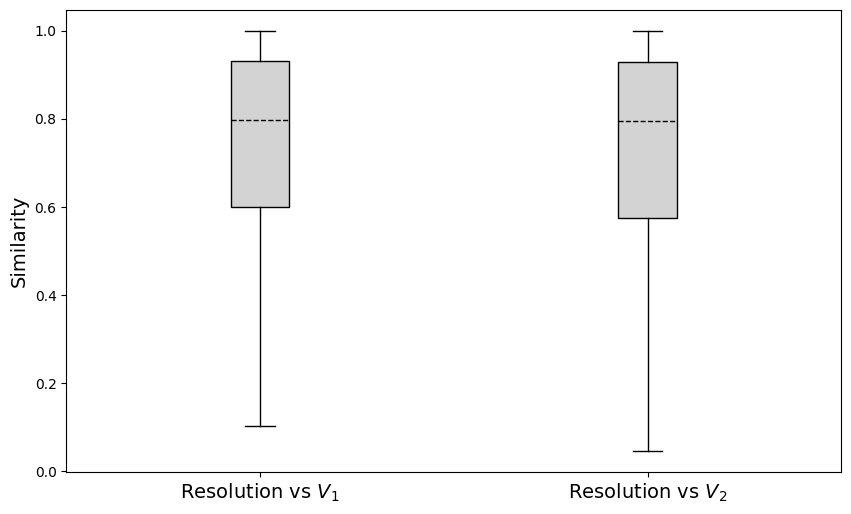

In [9]:
# Create a boxplot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.boxplot([df_new['solution_v1_gestalt_sim'], df_new['solution_v2_gestalt_sim']#, df_new['resolution_parents_gestalt_sim']#
            ], 
            patch_artist=True,  # To fill the box with color
#             widths=0.5,  # Width of the box
            medianprops=dict(color='black', linestyle='--'),  # Color of the median line
            boxprops=dict(facecolor='lightgray', color='black'),  # Color of the box
            whiskerprops=dict(color='black'),  # Color of the whiskers
            capprops=dict(color='black'),  # Color of the caps
            showfliers=False)  # Properties of the outliers
# plt.xlabel('Your X Label')
plt.ylabel('Similarity', fontsize=14)
plt.xticks([1, 2#, 3
           ], ['Resolution vs $V_1$', 'Resolution vs $V_2$'#, 'Solution vs parents (mean)'
                      ], fontsize=14)
# plt.title('Similarity between random candidates and parents \n using each aggregation function', fontsize=16)
plt.savefig('new_RQ1_boxplot.png', dpi=300)
plt.show()  # Show the plot

In [10]:
df_new[['solution_v1_gestalt_sim', 'solution_v2_gestalt_sim']].describe()

,solution_v1_gestalt_sim,solution_v2_gestalt_sim
count,9998.000000,9998.000000
mean,0.709230,0.702452
std,0.283272,0.285565
min,0.000000,0.000000
25%,0.599556,0.576033
50%,0.797829,0.794346
75%,0.931293,0.929577
max,0.999526,0.999597


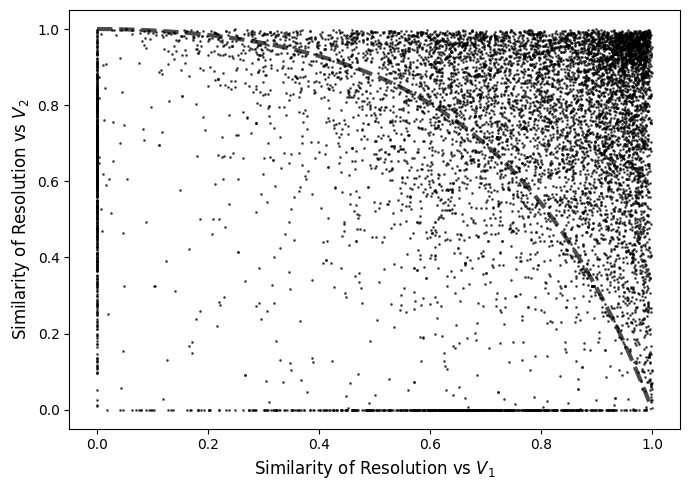

In [57]:
# Create a boxplot
# plt.figure(figsize=(10, 6))  # Set the figure size
# plt.scatter(x='solution_v1_gestalt_sim', y='solution_v2_gestalt_sim',  marker='.', s=4)
# plt.xlabel('Your X Label')
# plt.ylabel('Similarity (%)', fontsize=14)
# plt.xticks([1, 2#, 3
#            ], ['Solution vs V1', 'Solution vs V2'#, 'Solution vs parents (mean)'
#                       ], fontsize=14)
# plt.title('Similarity between random candidates and parents \n using each aggregation function', fontsize=16)
# plt.savefig('new_RQ1_scatter.png', dpi=300)
# plt.show()  # Show the plot
# df_new.plot.scatter('solution_v1_gestalt_sim', 'solution_v2_gestalt_sim',  marker='.', s=4)

# Create a 2x2 matrix of subplots
fig, axs = plt.subplots(1, 1, figsize=(7, 5))

# Scatter plot for aggregate_mean_gestalt
axs.scatter(df_new['solution_v1_gestalt_sim'], df_new['solution_v2_gestalt_sim'], color='black', alpha=0.6, marker='.', s=4)
# axs.set_title('Resolution x Parents similarity', fontsize=14)
axs.set_xlabel('Similarity of Resolution vs $V_1$', fontsize=12)
axs.set_ylabel('Similarity of Resolution vs $V_2$', fontsize=12)

point1 = (0,1)
point2 = (1,0)

def hanging_line(point1, point2, curvature=1.0):
    x1, y1 = point1
    x2, y2 = point2

    a = (y2 - y1) / (np.cosh(curvature * x2) - np.cosh(curvature * x1))
    b = y1 - a * np.cosh(curvature * x1)

    # Gerar pontos
    x = np.linspace(x1, x2, 100)
    y = a * np.cosh(curvature * x) + b

    return x, y


x,y = hanging_line(point1, point2,3.6)
plt.plot(x,y, '--', alpha=.7, color='k', linewidth=3)


# Adjust layout
plt.tight_layout()

# Show the plot
# plt.suptitle('Scatter plot of candidate/resolution and candidate/parents similarity \n using different aggregation functions', y=1.02, fontsize=16)
# plt.savefig('RQ3_scatter.png', dpi=300)
plt.savefig('new_RQ1_scatter.png', dpi=300)
plt.show()

In [11]:
df_new[df_new['solution_v1_gestalt_sim']==0]

,chunk_id,solution_v1_gestalt_sim,solution_v2_gestalt_sim,resolution_parents_gestalt_sim,error
14,777042,0.0,0.647059,0.323529,NaN
24,777309,0.0,0.955189,0.477594,NaN
49,777749,0.0,0.600000,0.300000,NaN
65,777826,0.0,0.690196,0.345098,NaN
75,777950,0.0,0.991254,0.495627,NaN
...,...,...,...,...,...
10412,1601128,0.0,0.737589,0.368794,NaN
10429,1601548,0.0,0.849498,0.424749,NaN
10441,1601652,0.0,0.628571,0.314286,NaN
10641,1610445,0.0,0.656250,0.328125,NaN


In [12]:
df_new[df_new['solution_v2_gestalt_sim']==0]

,chunk_id,solution_v1_gestalt_sim,solution_v2_gestalt_sim,resolution_parents_gestalt_sim,error
13,776973,0.093863,0.0,0.046931,NaN
38,777537,0.822535,0.0,0.411268,NaN
47,777744,0.809249,0.0,0.404624,NaN
50,777775,0.514658,0.0,0.257329,NaN
67,777856,0.793798,0.0,0.396899,NaN
...,...,...,...,...,...
10503,1602743,0.525773,0.0,0.262887,NaN
10526,1602271,0.707317,0.0,0.353659,NaN
10529,1602930,0.363636,0.0,0.181818,NaN
10580,1603180,0.640177,0.0,0.320088,NaN


In [13]:
print(f"{(len(df_new[df_new['solution_v1_gestalt_sim']==0])/len(df_new)*100):.2f}% of the chunks have the similarity between the resolution and v1 = 0 ")
print(f"{(len(df_new[df_new['solution_v2_gestalt_sim']==0])/len(df_new)*100):.2f}% of the chunks have the similarity between the resolution and v1 = 0 ")

7.49% of the chunks have the similarity between the resolution and v1 = 0 
7.22% of the chunks have the similarity between the resolution and v1 = 0 


In [14]:
df_new.describe()

,chunk_id,solution_v1_gestalt_sim,solution_v2_gestalt_sim,resolution_parents_gestalt_sim,error
count,9.998000e+03,9998.000000,9998.000000,9998.000000,0.0
mean,1.097219e+06,0.709230,0.702452,0.705841,NaN
std,2.121029e+05,0.283272,0.285565,0.210118,NaN
min,7.766620e+05,0.000000,0.000000,0.004633,NaN
25%,9.395962e+05,0.599556,0.576033,0.608540,NaN
50%,1.064852e+06,0.797829,0.794346,0.754110,NaN
75%,1.258395e+06,0.931293,0.929577,0.866156,NaN
max,1.658666e+06,0.999526,0.999597,0.995601,NaN


In [15]:
df_new

,chunk_id,solution_v1_gestalt_sim,solution_v2_gestalt_sim,resolution_parents_gestalt_sim,error
0,776662,0.760346,0.969600,0.864973,NaN
1,776782,0.744150,0.718346,0.731248,NaN
2,776793,0.969259,0.368421,0.668840,NaN
3,776828,0.958801,0.869919,0.914360,NaN
4,776863,0.671053,0.958763,0.814908,NaN
...,...,...,...,...,...
10648,1652324,0.911565,0.974684,0.943124,NaN
10649,1652325,0.842640,0.975610,0.909125,NaN
10771,1658634,0.966543,0.880808,0.923675,NaN
10772,1658665,0.949367,0.852071,0.900719,NaN


In [16]:
df_new[df_new['chunk_id']==939111]

,chunk_id,solution_v1_gestalt_sim,solution_v2_gestalt_sim,resolution_parents_gestalt_sim,error
2572,939111,0.170543,0.17801,0.174277,NaN


In [17]:
df = df_new.merge(df_attributes, on='chunk_id')
df

,chunk_id,solution_v1_gestalt_sim,solution_v2_gestalt_sim,resolution_parents_gestalt_sim,error,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,0.760346,0.969600,0.864973,NaN,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,0.744150,0.718346,0.731248,NaN,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,0.969259,0.368421,0.668840,NaN,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,0.958801,0.869919,0.914360,NaN,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,0.671053,0.958763,0.814908,NaN,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,1652324,0.911565,0.974684,0.943124,NaN,0.50,0.50,0.50,0.50,0.00,v1 v2,0,1,0.00,50.00,1,2,1.0
9994,1652325,0.842640,0.975610,0.909125,NaN,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,50.00,2,2,0.0
9995,1658634,0.966543,0.880808,0.923675,NaN,0.71,0.71,0.50,0.50,0.43,v2 (v1_2) v1 (v1_2) v2,2,0,28.57,0.00,7,5,-2.0
9996,1658665,0.949367,0.852071,0.900719,NaN,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,50.00,2,2,0.0


In [18]:
df[df['solution_v1_gestalt_sim']==0]['v1_size'].describe()

count    749.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: v1_size, dtype: float64

In [19]:
df[df['solution_v2_gestalt_sim']==0]['v2_size'].describe()

count    722.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: v2_size, dtype: float64